<a href="https://colab.research.google.com/github/RyomaBF/CAP4630/blob/master/HW2part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
print(train_images.shape)
print(train_images.dtype)
print(train_labels.shape)

(50000, 32, 32, 3)
uint8
(50000, 1)


In [0]:
import matplotlib.pyplot as plt
import numpy as np

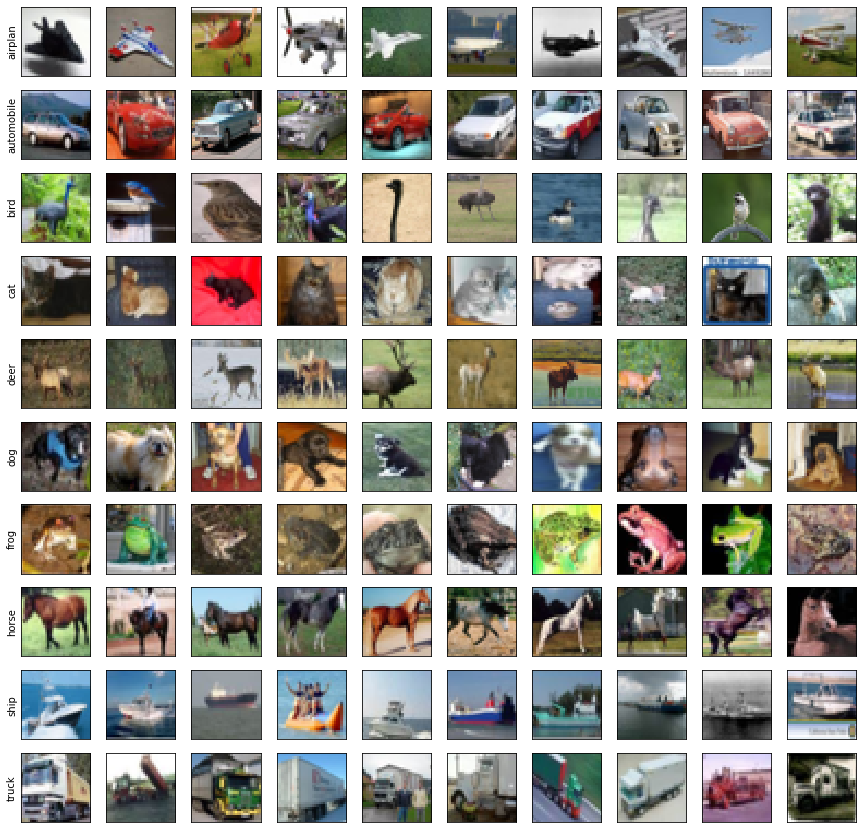

In [0]:
table = [[] for _ in range(10)]
for i in range(len(train_images)):
  label = train_labels[i, 0]
  table[label].append(i)

plt.figure(figsize=(15,15))
for class_index in range(10):
  for example_index in range(10):
    plt.subplot(10, 10, class_index * 10 + example_index + 1)
    plt.xticks([])
    plt.yticks([])
    if example_index == 0:
      plt.ylabel(class_names[class_index], rotation=90)
    plt.grid(False)
    plt.imshow(train_images[table[class_index][example_index]], cmap=plt.cm.binary)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)), 
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                147520    
_________________________________________

In [0]:
# compile the model
model.compile(optimizer='adam', #Adaptive Moment Estimation
             loss='sparse_categorical_crossentropy', 
             metrics=['accuracy'])
            

# train the model
epochs = 10
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 64s 1ms/sample - loss: 1.2727 - acc: 0.5482 - val_loss: 1.1815 - val_acc: 0.5807
Epoch 2/10
50000/50000 [==============================] - 63s 1ms/sample - loss: 1.0470 - acc: 0.6333 - val_loss: 1.0612 - val_acc: 0.6322
Epoch 3/10
50000/50000 [==============================] - 63s 1ms/sample - loss: 0.9300 - acc: 0.6769 - val_loss: 0.9696 - val_acc: 0.6662
Epoch 4/10
50000/50000 [==============================] - 63s 1ms/sample - loss: 0.8504 - acc: 0.7059 - val_loss: 0.9250 - val_acc: 0.6837
Epoch 5/10
50000/50000 [==============================] - 62s 1ms/sample - loss: 0.7815 - acc: 0.7286 - val_loss: 0.9530 - val_acc: 0.6711
Epoch 6/10
50000/50000 [==============================] - 62s 1ms/sample - loss: 0.7177 - acc: 0.7504 - val_loss: 0.9015 - val_acc: 0.6951
Epoch 7/10
50000/50000 [==============================] - 62s 1ms/sample - loss: 0.6695 - acc: 0.7663 - val_loss: 0.

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 4s 406us/sample - loss: 0.9792 - acc: 0.6984
Test accuracy: 0.6984


In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)


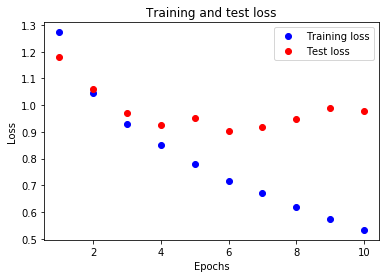

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

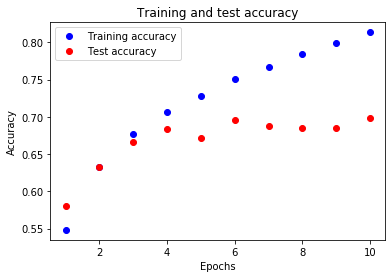

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The graphs above and the convolution steps taken above show this as an underfitting solution. As seen on the graph, the test accuracy dips off around the 5th epoch.

In [2]:
import tensorflow as tf
from tensorflow import keras

cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
print(train_images.shape)
print(train_images.dtype)
print(train_labels.shape)

(50000, 32, 32, 3)
uint8
(50000, 1)


In [0]:
import matplotlib.pyplot as plt
import numpy as np

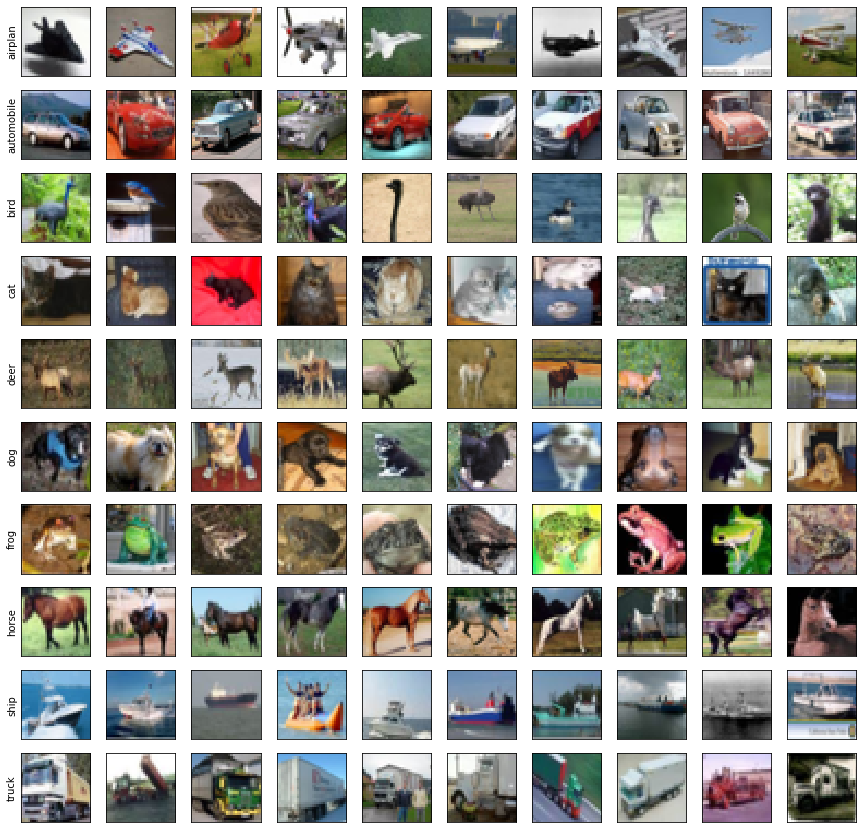

In [5]:
table = [[] for _ in range(10)]
for i in range(len(train_images)):
  label = train_labels[i, 0]
  table[label].append(i)

plt.figure(figsize=(15,15))
for class_index in range(10):
  for example_index in range(10):
    plt.subplot(10, 10, class_index * 10 + example_index + 1)
    plt.xticks([])
    plt.yticks([])
    if example_index == 0:
      plt.ylabel(class_names[class_index], rotation=90)
    plt.grid(False)
    plt.imshow(train_images[table[class_index][example_index]], cmap=plt.cm.binary)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)), 
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(64, (3, 3), activation='sigmoid'),
    
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(256, activation='sigmoid'), 
    keras.layers.Dense(64, activation='sigmoid'), 
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________

In [14]:
model.compile(optimizer='adam', #Adaptive Moment Estimation
             loss='sparse_categorical_crossentropy', 
             metrics=['accuracy'])
            

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 8s 151us/sample - loss: 0.5893 - acc: 0.7949 - val_loss: 0.9503 - val_acc: 0.6863
Epoch 2/20
50000/50000 [==============================] - 7s 148us/sample - loss: 0.5237 - acc: 0.8176 - val_loss: 0.9970 - val_acc: 0.6926
Epoch 3/20
50000/50000 [==============================] - 7s 149us/sample - loss: 0.4597 - acc: 0.8390 - val_loss: 0.9861 - val_acc: 0.6930
Epoch 4/20
50000/50000 [==============================] - 7s 149us/sample - loss: 0.3991 - acc: 0.8611 - val_loss: 1.0352 - val_acc: 0.6875
Epoch 5/20
50000/50000 [==============================] - 7s 149us/sample - loss: 0.3380 - acc: 0.8830 - val_loss: 1.1272 - val_acc: 0.6864
Epoch 6/20
50000/50000 [==============================] - 7s 148us/sample - loss: 0.2825 - acc: 0.9036 - val_loss: 1.1992 - val_acc: 0.6823
Epoch 7/20
50000/50000 [==============================] - 7s 148us/sample - loss: 0.2440 - acc: 0.9171 - val_l

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 79us/sample - loss: 1.8832 - acc: 0.6713
Test accuracy: 0.6713


In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

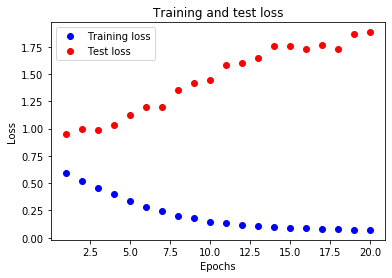

In [17]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

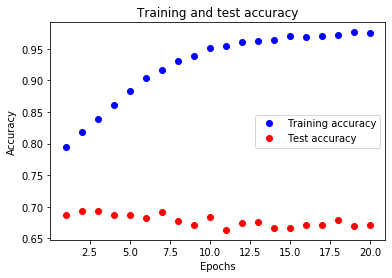

In [19]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
import tensorflow as tf
from tensorflow import keras

cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Above graphs show the process of overfitting. The convolution steps are complicated and more than that of the underfitting, but test results show that even though the training accuracy gets better, the testing data accuracy never gets any better. 

In [0]:
print(train_images.shape)
print(train_images.dtype)
print(train_labels.shape)

(50000, 32, 32, 3)
uint8
(50000, 1)


In [0]:
import matplotlib.pyplot as plt
import numpy as np

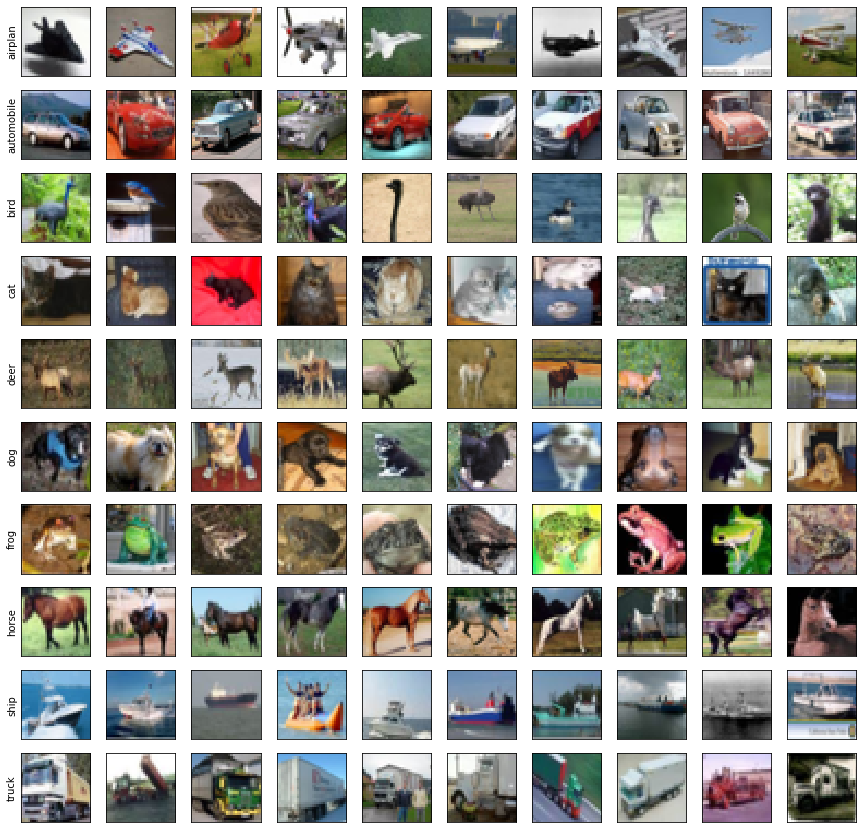

In [21]:
table = [[] for _ in range(10)]
for i in range(len(train_images)):
  label = train_labels[i, 0]
  table[label].append(i)

plt.figure(figsize=(15,15))
for class_index in range(10):
  for example_index in range(10):
    plt.subplot(10, 10, class_index * 10 + example_index + 1)
    plt.xticks([])
    plt.yticks([])
    if example_index == 0:
      plt.ylabel(class_names[class_index], rotation=90)
    plt.grid(False)
    plt.imshow(train_images[table[class_index][example_index]], cmap=plt.cm.binary)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [87]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='elu', input_shape=(32, 32, 3)), 
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(64, (3, 3), activation='elu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(64, (3, 3), activation='elu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Flatten(),
    #keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(256, activation='sigmoid'), 
    keras.layers.Dense(64, activation='sigmoid'), 
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 4, 4, 64)        

In [88]:
# compile the model
model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy', 
             metrics=['accuracy'])
            

# train the model
epochs = 30
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 10s 193us/sample - loss: 1.9968 - acc: 0.2652 - val_loss: 1.7159 - val_acc: 0.3861
Epoch 2/30
50000/50000 [==============================] - 9s 173us/sample - loss: 1.6974 - acc: 0.3842 - val_loss: 1.5915 - val_acc: 0.4269
Epoch 3/30
50000/50000 [==============================] - 9s 175us/sample - loss: 1.5795 - acc: 0.4315 - val_loss: 1.5554 - val_acc: 0.4484
Epoch 4/30
50000/50000 [==============================] - 9s 174us/sample - loss: 1.4998 - acc: 0.4575 - val_loss: 1.4177 - val_acc: 0.4838
Epoch 5/30
50000/50000 [==============================] - 9s 174us/sample - loss: 1.4416 - acc: 0.4811 - val_loss: 1.3586 - val_acc: 0.5064
Epoch 6/30
50000/50000 [==============================] - 9s 174us/sample - loss: 1.3968 - acc: 0.4978 - val_loss: 1.3722 - val_acc: 0.5126
Epoch 7/30
50000/50000 [==============================] - 9s 174us/sample - loss: 1.3566 - acc: 0.5176 - val_

In [89]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 95us/sample - loss: 1.0309 - acc: 0.6395
Test accuracy: 0.6395


In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

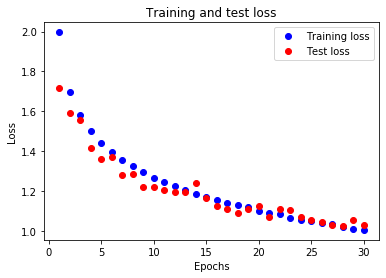

In [91]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

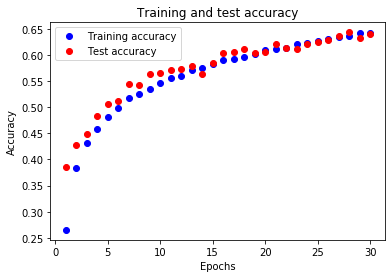

In [93]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

These graphs above show when the covolution steps are just right. As you can see, the graph data of the test accuracy goes up as well as the training.

In [0]:
import tensorflow as tf
from tensorflow import keras

cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [95]:
print(train_images.shape)
print(train_images.dtype)
print(train_labels.shape)

(50000, 32, 32, 3)
uint8
(50000, 1)


In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [98]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='elu', input_shape=(32, 32, 3)), 
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(64, (3, 3), activation='elu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(64, (3, 3), activation='elu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Flatten(),
    #keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(256, activation='sigmoid'), 
    keras.layers.Dense(64, activation='sigmoid'), 
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 4, 4, 64)        

In [99]:
# compile the model
model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy', 
             metrics=['accuracy'])
            

# train the model
epochs = 100
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 190us/sample - loss: 1.6618 - acc: 0.3892 - val_loss: 1.3652 - val_acc: 0.5082
Epoch 2/100
50000/50000 [==============================] - 9s 174us/sample - loss: 1.3452 - acc: 0.5146 - val_loss: 1.1968 - val_acc: 0.5734
Epoch 3/100
50000/50000 [==============================] - 9s 175us/sample - loss: 1.2299 - acc: 0.5598 - val_loss: 1.1605 - val_acc: 0.5819
Epoch 4/100
50000/50000 [==============================] - 9s 174us/sample - loss: 1.1482 - acc: 0.5928 - val_loss: 1.0287 - val_acc: 0.6364
Epoch 5/100
50000/50000 [==============================] - 9s 174us/sample - loss: 1.0920 - acc: 0.6133 - val_loss: 1.0066 - val_acc: 0.6434
Epoch 6/100
50000/50000 [==============================] - 9s 175us/sample - loss: 1.0531 - acc: 0.6275 - val_loss: 0.9729 - val_acc: 0.6574
Epoch 7/100
50000/50000 [==============================] - 9s 172us/sample - loss: 1.0217 - acc: 0.6404 

In [100]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 92us/sample - loss: 0.7505 - acc: 0.7428
Test accuracy: 0.7428


In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

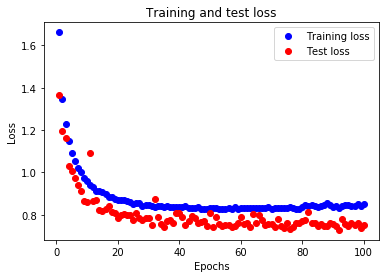

In [102]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

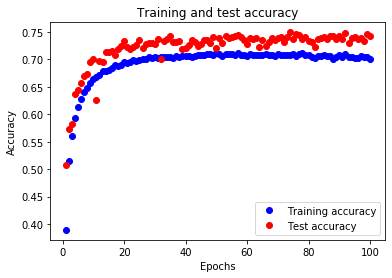

In [104]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()